In [3]:
import os
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white', {'xtick.bottom': True, 'ytick.left': True})
sns.set_context('notebook', font_scale=2)

%load_ext autoreload
%autoreload 2

os.chdir("../")

In [7]:
result_path = "RESULT/STPENet/STPENet_A_3.pkl"

In [8]:
temp = pickle.load(open(result_path, 'rb'))

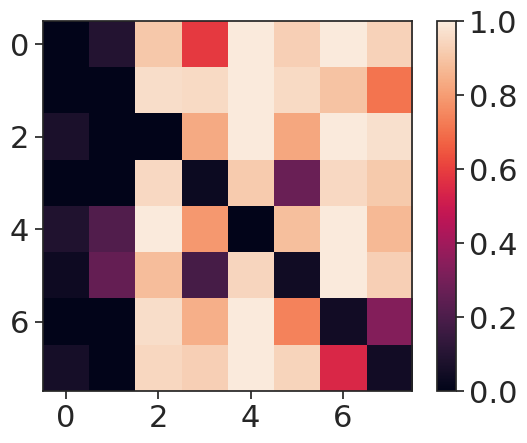

In [9]:
plt.imshow(temp['confusion_matrix'])
plt.colorbar()
plt.clim(0, 1)

Text(0, 0.5, 'units')

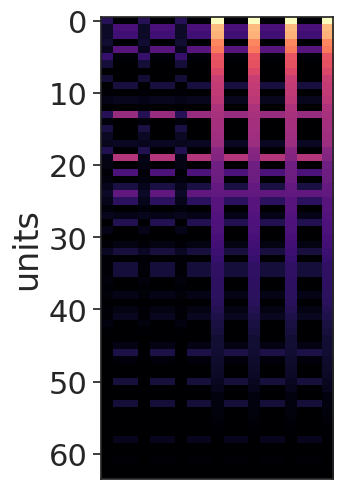

In [11]:
model_data = temp
input_act = model_data['input']
hidden_act = model_data['hidden']
labels = model_data['labels']
image = model_data['image']

# find preferred image
img_idx = [np.argwhere(image==i) for i in range(8)]
input_act_image = [input_act[i[:,0], i[:,1]].mean(axis=0) for i in img_idx]
pref_image = np.argmax(np.stack(input_act_image), axis=0)

# # find go trials
# idx = np.argwhere(labels.squeeze()==1)

# go_trial = []
# for trial in idx:
#     trial_chunk = hidden_act[trial[0], (trial[1]-9):(trial[1]+9+1)]
#     if trial_chunk.shape[0] == 19:
#         go_trial.append(trial_chunk)
        
# go_trial = np.stack(go_trial).mean(axis=0).transpose()

go_trial = np.zeros((input_act.shape[2], 19))
for cell in range(go_trial.shape[0]):
    idx = np.argwhere((labels.squeeze()==1)&(image==pref_image[cell]))
    go_trials = []
    for trial in idx:
        trial_chunk = input_act[trial[0], (trial[1]-9):(trial[1]+9+1), cell]
        if trial_chunk.shape[0] == go_trial.shape[1]:
            go_trials.append(trial_chunk)
    go_trial[cell,:] = np.stack(go_trials).mean(axis=0)

idx = np.argsort(go_trial[:,9])[::-1]

sns.set_style({'xtick.bottom': True, 'ytick.left': True,})
plt.figure(figsize=(3,6))
plt.imshow(go_trial[idx,:], vmin=0, vmax=go_trial[idx,:].max(), cmap='magma', aspect='auto')  # 0.75)  # input_act[0].transpose()[:, 12:], aspect='auto')
# plt.xticks(np.linspace(0,18,3), (-2.25, 0, 2.25))
plt.xticks([])
plt.ylabel('units')
# plt.xlabel('time after change (s)')

# plt.savefig('figures/example_stsp_population_response.png', dpi=300, bbox_inches='tight')

Text(0, 0.5, 'a.u.')

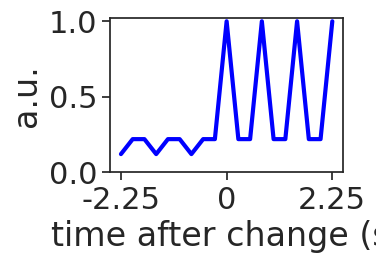

In [13]:
fig, ax = plt.subplots(figsize=(3,2))

# plt.plot(go_trial.mean(axis=0), color=colors[1], linewidth=3)
plt.plot(go_trial.mean(axis=0) / go_trial.mean(axis=0).max(), color='blue', linewidth=3)
plt.xticks(np.linspace(0,18,3), (-2.25, 0, 2.25))

ax.set_yticks([0, 0.5, 1.0])
ax.set_ylim([0, 1.02])
ax.set_xlabel('time after change (s)')
ax.set_ylabel('a.u.')


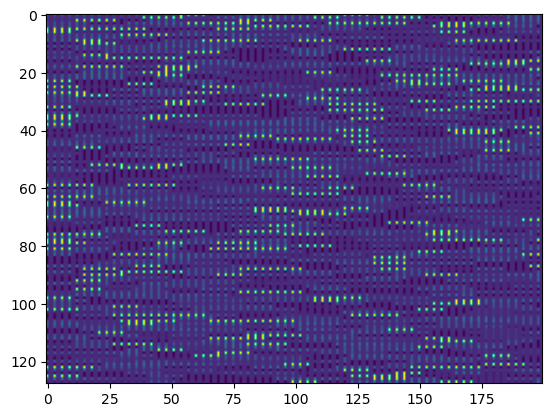

In [ ]:
plt.imshow(inputs[:,:,1], aspect="auto")

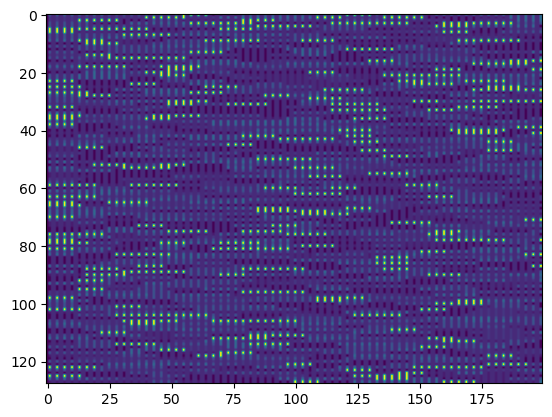

In [ ]:
plt.imshow(inputs_prev[:,:,1], aspect="auto")

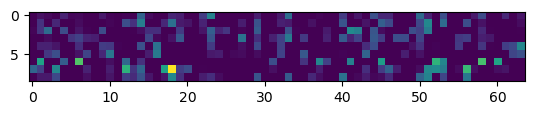

In [ ]:
plt.imshow(gen.feature_dict)

In [2]:
import os
import matplotlib.pyplot as plt
os.chdir('/mmfs1/gscratch/rao/aresf/Code/STSPNet/')

import torch
from models import STPENet

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(use_cuda)

True


In [4]:
from stimulus import StimGenerator
import numpy as np
gen = StimGenerator(image_set='A', seed=1, batch_size=128, seq_length=50000,
                                    delay_dur=500)
input_dim = len(gen.feature_dict[0])

In [5]:
inputs, inputs_prev, labels, image, mask, omit = gen.generate_batch()
inputs = torch.from_numpy(inputs).to(device)
inputs_prev = torch.from_numpy(inputs_prev).to(device)
labels = torch.from_numpy(labels).to(device)

In [10]:
model = STPENet(input_dim=input_dim,
                hidden_dim=16,
                syn_tau=6.0,
                noise_std=0.5).to(device)
model.syn_x = model.init_syn_x(128).to(device)

In [9]:
train()

(tensor([[[ 2.0892e-01],
          [-4.9203e-03],
          [-1.5774e-01],
          ...,
          [ 6.8634e-01],
          [-6.8142e-03],
          [ 1.7576e-01]],
 
         [[ 1.1648e-01],
          [ 4.8896e-02],
          [-5.7583e-02],
          ...,
          [ 3.5043e-01],
          [ 6.1735e-01],
          [-1.0213e+00]],
 
         [[ 1.8201e-01],
          [ 5.0804e-02],
          [ 1.2753e-02],
          ...,
          [ 1.2096e+00],
          [ 5.7112e-01],
          [-1.5018e+00]],
 
         ...,
 
         [[ 2.1346e-01],
          [ 8.1307e-02],
          [ 1.8991e-01],
          ...,
          [ 2.9616e-01],
          [ 1.4614e-02],
          [ 1.0403e+00]],
 
         [[ 4.2898e-01],
          [ 1.6500e-01],
          [ 2.2999e-01],
          ...,
          [-3.5175e+00],
          [ 6.2739e+00],
          [-1.3795e+00]],
 
         [[ 1.5785e-01],
          [ 2.3236e-01],
          [ 2.4423e-02],
          ...,
          [ 4.8659e-02],
          [ 2.9662e+00],
    